In [1]:
!python -m pip install --upgrade pip

!pip install numpy
!pip install scikit-learn
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install opencv-python
!pip install tensorflow
!pip install Pillow
!pip install xml-python
!pip install glob2

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle\\python Docker image: https:\\\\github.com\\kaggle\\docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I\\O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2
import seaborn as sns
import PIL
import xml.etree.ElementTree as ET
import glob

# Input data files are available in the read-only "..\\input\\" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('D:\\DataScience\\FaceMaskDetection\\reducedInput'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (\\kaggle\\working\\) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to \\kaggle\\temp\\, but they won't be saved outside of the current session

D:\DataScience\FaceMaskDetection\reducedInput\annotations\maksssksksss0.xml
D:\DataScience\FaceMaskDetection\reducedInput\annotations\maksssksksss1.xml
D:\DataScience\FaceMaskDetection\reducedInput\annotations\maksssksksss10.xml
D:\DataScience\FaceMaskDetection\reducedInput\annotations\maksssksksss2.xml
D:\DataScience\FaceMaskDetection\reducedInput\annotations\maksssksksss3.xml
D:\DataScience\FaceMaskDetection\reducedInput\annotations\maksssksksss4.xml
D:\DataScience\FaceMaskDetection\reducedInput\annotations\maksssksksss5.xml
D:\DataScience\FaceMaskDetection\reducedInput\annotations\maksssksksss6.xml
D:\DataScience\FaceMaskDetection\reducedInput\annotations\maksssksksss7.xml
D:\DataScience\FaceMaskDetection\reducedInput\annotations\maksssksksss8.xml
D:\DataScience\FaceMaskDetection\reducedInput\annotations\maksssksksss9.xml
D:\DataScience\FaceMaskDetection\reducedInput\images\maksssksksss0.png
D:\DataScience\FaceMaskDetection\reducedInput\images\maksssksksss1.png
D:\DataScience\FaceMa

In [3]:
# Path
img_dir = 'D:\\DataScience\\FaceMaskDetection\\reducedInput\\images'
annotation_dir = 'D:\\DataScience\\FaceMaskDetection\\reducedInput\\annotations'

input_dir = 'D:\\DataScience\\FaceMaskDetection\\reducedInput'
output_dir = 'D:\\DataScience\\FaceMaskDetection\\reducedOutput'

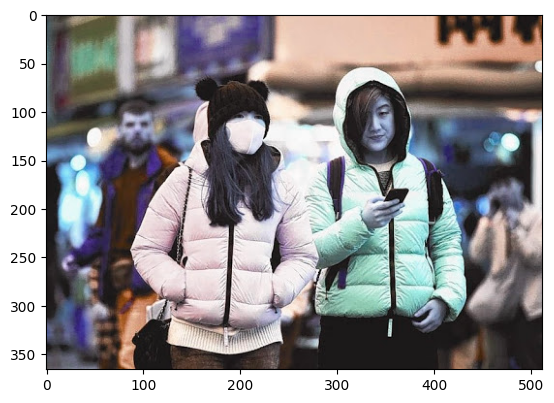

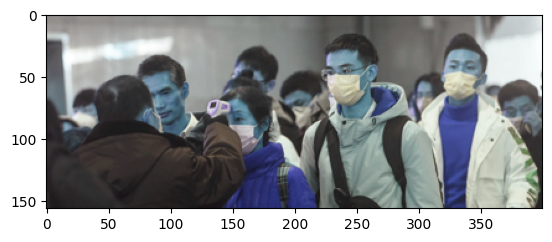

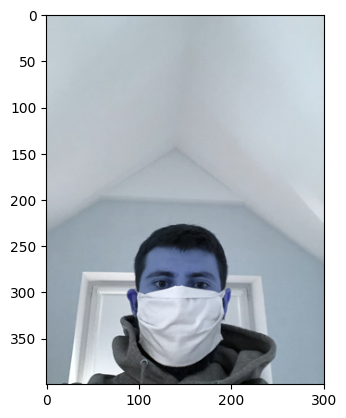

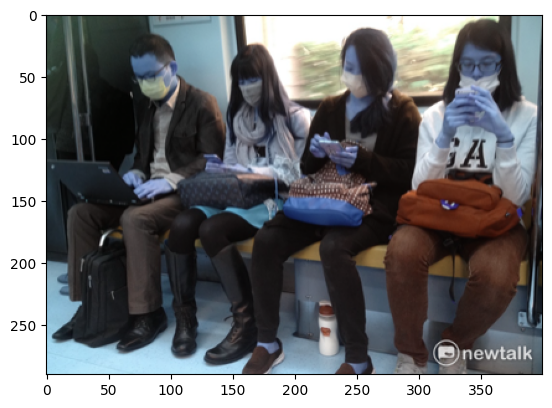

In [4]:
# sample visuaization
for idx, image in enumerate(os.listdir(img_dir)):
    img = cv2.imread(os.path.join(img_dir, image), 1)
    plt.imshow(img)
    plt.show()
    
    if idx == 3:
        break

In [5]:
# make img_file_path
img_file_path = []
for img in os.listdir(img_dir):
    image  = cv2.imread(os.path.join(img_dir, img), 0)
    img_file_path.append(f'{img}')

In [6]:
df = { 'name': [],
        'label': [],
      'width': [],
      'height': [],
     'xmin': [],
     'ymin': [],
     'xmax': [],
     'ymax': []}

for idx, anno in enumerate(glob.glob(annotation_dir + '/*.xml')):
    trees = ET.parse(anno)
    
    #print(anno)
    root = trees.getroot()
    width, height = [], []
    for item in root.iter():
        #print(item)
               
        if item.tag == 'size':
            for attr in list(item):
                if attr.tag == 'width':
                    width = int(round(float(attr.text)))
                if attr.tag == 'height':
                    height = int(round(float(attr.text)))
                    
        if item.tag == 'object':
            for attr in list(item):
                if 'name' in attr.tag:
                    label = attr.text
                    df['label'] += [label]
                    df['width'] += [width]
                    df['height'] += [height]
                    #dataset['name']+=[anno.split('/')[-1][0:-4]] 
                    df['name'] += [anno.split('\\')[-1][0:-4]]
                    
                if 'bndbox' in attr.tag:
                    for dim in attr:
                        if dim.tag == 'xmin':
                            xmin = int(round(float(dim.text)))
                            df['xmin'] += [xmin]
                            
                        if dim.tag == 'ymin':
                            ymin = int(round(float(dim.text)))
                            df['ymin'] += [ymin]
                        if dim.tag == 'xmax':
                            xmax = int(round(float(dim.text)))
                            df['xmax'] += [xmax]
                        if dim.tag == 'ymax':
                            ymax = int(round(float(dim.text)))
                            df['ymax'] += [ymax]

In [7]:
df1 = pd.DataFrame(df)
df1.head()

,name,label,width,height,xmin,ymin,xmax,ymax
0,maksssksksss0,without_mask,512,366,79,105,109,142
1,maksssksksss0,with_mask,512,366,185,100,226,144
2,maksssksksss0,without_mask,512,366,325,90,360,141
3,maksssksksss1,with_mask,400,156,321,34,354,69
4,maksssksksss1,with_mask,400,156,224,38,261,73


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    39 non-null     object
 1   label   39 non-null     object
 2   width   39 non-null     int64 
 3   height  39 non-null     int64 
 4   xmin    39 non-null     int64 
 5   ymin    39 non-null     int64 
 6   xmax    39 non-null     int64 
 7   ymax    39 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 2.6+ KB


In [9]:
label_map = { 'without_mask': 0,
            'with_mask': 1,
            'mask_weared_incorrect': 2}

df1['class'] = df1['label'].map(label_map)

In [10]:
# split train, test, val data
from sklearn.model_selection import train_test_split

train, test = train_test_split(img_file_path, test_size=0.2, random_state=101)
train, val = train_test_split(train, test_size=0.15, random_state=101)

In [11]:
# yolo v5
%cd reducedOutput
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -qr requirements.txt

D:\DataScience\FaceMaskDetection\reducedOutput
D:\DataScience\FaceMaskDetection\reducedOutput\yolov5


Cloning into 'yolov5'...


In [12]:
# create a separate folder structure for train, validation and test image and validation files
os.chdir(r'D:\\DataScience\\FaceMaskDetection\\reducedOutput')
os.mkdir(r'.\\yolov5\\data\\train')
os.mkdir(r'.\\yolov5\\data\\val')
os.mkdir(r'.\\yolov5\\data\\test')
os.mkdir(r'.\\yolov5\\data\\train\\images')
os.mkdir(r'.\\yolov5\\data\\train\\labels')
os.mkdir(r'.\\yolov5\\data\\val\\images')
os.mkdir(r'.\\yolov5\\data\\val\\labels')
os.mkdir(r'.\\yolov5\\data\\test\\images')
os.mkdir(r'.\\yolov5\\data\\test\\labels')

In [13]:
# copy the image data in the yolov5 folder 
def copy_image_file(image_items, folder_name):
    
    for image in image_items:
        img = PIL.Image.open(f'{img_dir}\\{image}')
        img1 = img.resize((640, 480))
        _ = img1.save(f'{output_dir}\\yolov5\\data\\{folder_name}\\images\\{image}')

copy_image_file(train, 'train')
copy_image_file(val, 'val')
copy_image_file(test, 'test')

In [14]:
df1['xmin'] = (640/df1['width']) * df1['xmin']
df1['ymin'] = (480/df1['height']) * df1['ymin']
df1['xmax'] = (640/df1['width']) * df1['xmax']
df1['ymax'] = (480/df1['height']) * df1['ymax']
df1.head()

,name,label,width,height,xmin,ymin,xmax,ymax,class
0,maksssksksss0,without_mask,512,366,98.75,137.704918,136.25,186.229508,0
1,maksssksksss0,with_mask,512,366,231.25,131.147541,282.50,188.852459,1
2,maksssksksss0,without_mask,512,366,406.25,118.032787,450.00,184.918033,0
3,maksssksksss1,with_mask,400,156,513.60,104.615385,566.40,212.307692,1
4,maksssksksss1,with_mask,400,156,358.40,116.923077,417.60,224.615385,1


In [15]:
df1[['xmin', 'ymin', 'xmax', 'ymax']] = df1[['xmin', 'ymin', 'xmax', 'ymax']].astype('int')

In [16]:
WIDTH = 640
HEIGHT = 480

In [17]:
df1['x_center'] = (df1['xmin']+df1['xmax'])/(2*WIDTH)
df1['y_center'] = (df1['ymin']+df1['ymax'])/(2*HEIGHT)
df1['box_width'] = (df1['xmax']-df1['xmin'])/ WIDTH
df1['box_height'] = (df1['ymax']-df1['ymin'])/ HEIGHT

In [18]:
df1.head()

,name,label,width,height,xmin,ymin,xmax,ymax,class,x_center,y_center,box_width,box_height
0,maksssksksss0,without_mask,512,366,98,137,136,186,0,0.182812,0.336458,0.059375,0.102083
1,maksssksksss0,with_mask,512,366,231,131,282,188,1,0.400781,0.332292,0.079687,0.118750
2,maksssksksss0,without_mask,512,366,406,118,450,184,0,0.668750,0.314583,0.068750,0.137500
3,maksssksksss1,with_mask,400,156,513,104,566,212,1,0.842969,0.329167,0.082812,0.225000
4,maksssksksss1,with_mask,400,156,358,116,417,224,1,0.605469,0.354167,0.092188,0.225000


In [19]:
df1 = df1.astype(str)

In [20]:
img_file_path[:5]

['maksssksksss0.png',
 'maksssksksss1.png',
 'maksssksksss10.png',
 'maksssksksss2.png',
 'maksssksksss3.png']

In [21]:
# copy the label data in the yolov5 folder 

def copy_label(label_items, folder_name):
    file_name = [x.split('.')[0] for x in img_file_path]
    for name in file_name:
        data = df1[df1.name == name]

        box_list = []
        for idx in range(len(data)):
            row = data.iloc[idx]
            box_list.append(row['class']+" "+row['x_center']+" "+row['y_center']+" "+ row['box_width']+" "+row['box_height'])

        text = "\n".join(box_list)
        with open(f'{output_dir}\\yolov5\\data\\{folder_name}\\labels\\{name}.txt', 'w') as file:
            file.write(text)

In [22]:
copy_label(train, 'train')
copy_label(val, 'val')
copy_label(test, 'test')

In [23]:
os.chdir(f'D:\\DataScience\\FaceMaskDetection\\reducedOutput\\yolov5\\data\\train\\labels')

In [24]:
# Configure .yaml file 
yaml_file = """train: D:\\DataScience\\FaceMaskDetection\\reducedOutput\\yolov5\\data\\train\\images
val: D:\\DataScience\\FaceMaskDetection\\reducedOutput\\yolov5\\data\\val\\images
                
nc: 3

names: [without_mask, with_mask, mask_weared_incorrect]"""

with open('D:\\DataScience\\FaceMaskDetection\\reducedOutput\\yolov5\\data\\data.yaml', 'w') as f:
    f.write(yaml_file)

## Model Training

In [ ]:
!python D:/DataScience/FaceMaskDetection/reducedOutput/yolov5/train.py --img 640 --epochs 50 --batch 32 --data D:/DataScience/FaceMaskDetection/reducedOutput/yolov5/data/data.yaml --cfg D:/DataScience/FaceMaskDetection/reducedOutput/yolov5/models/yolov5s.yaml --weights yolov5s.pt --name mask_wearing_yolov5